<a href="https://colab.research.google.com/github/egyfarandikasss/My-Titanic-Dataset-Solution/blob/main/My_Titanic_Solution_(Github).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [6]:
train = pd.read_csv('/content/train_titanic.csv')
test = pd.read_csv('/content/test_titanic.csv')
full =  [train, test]

## Understanding Data

In [7]:
print(train.shape)
train.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Variable in columns:**
1. PassengerId : Id Passengger (can ignore it)
2. Pclass : Ticket Class A proxy for socio-economic status (SES) (Categorical data: 1 = Upper, 2 = Midlle, 3 = Lower)
3. Name : Name of Passenger 
4. Sex : Gender (Categorical Data: Male and Female) 
5. Age : Numeric types data
6. SibSp : The dataset defines family relations in this way...\
Sibling = brother, sister, stepbrother, stepsister\
Spouse = husband, wife (mistresses and fiancés were ignored)
7. Parch : The dataset defines family relations in this way...
Parent = mother, father\
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.
8. Ticket : Ticket Number 
9. Fare : Passenger Fare 
10. Cabin : Number Cabin 
11. Embarked : Port of Embarked (Categorical: C = Cherbourg, Q = Queenstown, S = Southampton)


In [9]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

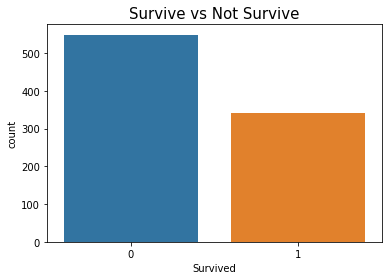

In [11]:
sns.countplot(x = 'Survived', data = train)
plt.title('Survive vs Not Survive', fontsize = 15)
plt.show()

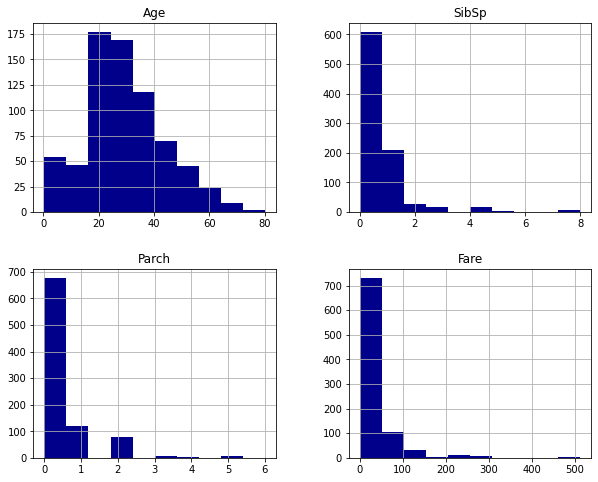

In [12]:
train[['Age', 'SibSp', 'Parch', 'Fare']].hist(color = 'darkblue')
plt.gcf().set_size_inches(10,8)
plt.show()

In [13]:
pd.pivot_table(train, index ='Survived', values = ['Age', 'SibSp', 'Parch', 'Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


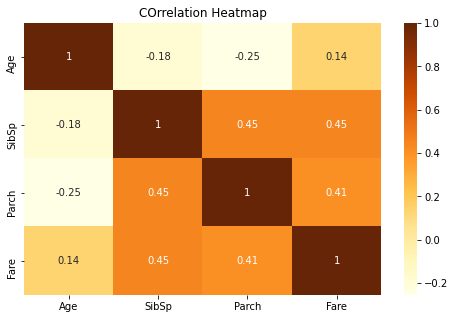

In [14]:
corr = train[['Age', 'SibSp', 'Parch', 'Fare']].corr(method = 'spearman')
sns.heatmap(corr, annot = True, cmap = 'YlOrBr')
plt.title('COrrelation Heatmap')
plt.gcf().set_size_inches(8,5)
plt.show()

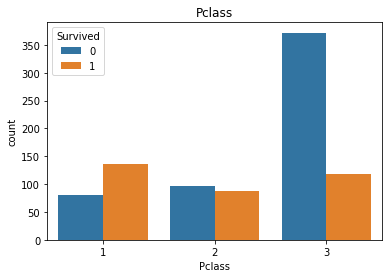

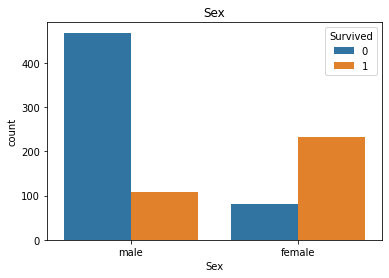

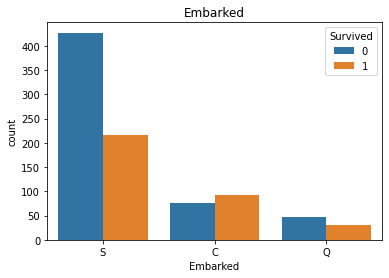

In [15]:
ax = train[['Pclass', 'Sex', 'Embarked']]
for i in ax.columns:
    sns.countplot(x = i, hue = 'Survived', data = train)
    plt.title(i)
    plt.show()

In [16]:
print(pd.pivot_table(train, index = 'Survived', columns = 'Pclass', values = 'PassengerId', aggfunc='count'))
print('----------------------')
print(pd.pivot_table(train, index = 'Survived', columns = 'Sex', values = 'PassengerId', aggfunc='count'))
print('----------------------')
print(pd.pivot_table(train, index = 'Survived', columns = 'Embarked', values = 'PassengerId', aggfunc='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119
----------------------
Sex       female  male
Survived              
0             81   468
1            233   109
----------------------
Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


In [17]:
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [18]:
train['Ticket'].head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

**The description and visualization of the data above give us a few interesting insights on the distribution of values.**
1. There are 38 % of passengers survived. 
2. Most of passengers have an Age < 40, the average of passengers is 29 and there are maximum passenger age are around 80. 
3. Most of the passengers paid a fare of under 50 and the average was around 32. Although some paid the highest fare of 512.
4. Parch and SibSp are related with correlation 0.45. 
5. People who have a higher class have a high chance of survived and we can see that most of the passengers are not survive are from class 3.  
6. Female have a higher chance of surviving than male. 
7. Most of the passengers started their embarked from S: Southampton.
8. Fare and SibSp looks not notmal distribution, should we need to normalizing that variables? 
9. Is the Cabin, Name, and Ticket are useful for prediction? I think we can understand the columns after calculate them by feature engineering. 

## Feature Engineering 

In [19]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
train['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

Is the name Title have a relation to survived or not survived? 

In [21]:
# Try to dig title name 
for data in full: 
    data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Jonkheer      1
Ms            1
Sir           1
Countess      1
Lady          1
Mme           1
Capt          1
Don           1
Name: Title, dtype: int64

There are so many titles, I am going group the title to Other title starting from Dr to Jonkheer

In [22]:
# grouping Title name
for data in full:
    data['Title'] = data['Title'].replace(['Lady', 'Countess','Capt', 'Col',
     'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')
    data['Title'] = data['Title'].replace('Mlle', 'Miss')
    
    data['Title'] = data['Title'].replace('Ms', 'Miss')
    data['Title'] = data['Title'].replace('Mme', 'Mrs')

In [23]:
train['Ticket'].head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

There are 2 types of Ticket, Number Ticket an letter Ticket. 

In [24]:
for data in full:
    data['Ticket'] = data['Ticket'].apply(lambda x: 'Number' if x.isnumeric() else 'Letter')
    data['Ticket'] = data['Ticket'].astype(str)

In [25]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,Letter,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,Letter,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,Letter,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,Number,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,Number,8.0500,NaN,S,Mr


In [26]:
train['Ticket'].value_counts()

Number    661
Letter    230
Name: Ticket, dtype: int64

In [27]:
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [28]:
print(train['Cabin'].isnull().sum())
print(train['Cabin'].value_counts().sum())

687
204


We have 687 missing values and 204 Cabin values, so I will replace missing values as 0 and non missing values as 1.

In [29]:
for data in full:
    data['Cabin'] = data["Cabin"].apply(lambda x: 0 if type(x) == float else 1)

In [30]:
train['Cabin'].value_counts()

0    687
1    204
Name: Cabin, dtype: int64

## Preprocessing

In [31]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,Letter,7.2500,0,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,Letter,71.2833,1,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,Letter,7.9250,0,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,Number,53.1000,1,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,Number,8.0500,0,S,Mr


In [32]:
# Checking missing values
print('Train: \n',train.isnull().sum())
print()
print('Test: \n',test.isnull().sum())

Train: 
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         2
Title            0
dtype: int64

Test: 
 PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Cabin           0
Embarked        0
Title           0
dtype: int64


### Pclas

In [33]:
# change the type of Pclass to category
for data in full:
    data['Pclass'] = data['Pclass'].astype(str)

### Title

In [34]:
# Mapping Title to ordinal data
mapping_title = {"Mr": 0, "Miss": 1, "Mrs": 2, "Master": 3, "Other": 4}
for data in full:
    data['Title'] = data['Title'].map(mapping_title)
    data['Title'] = data['Title'].fillna(0)

### Sex 

In [35]:
# Mapping Sex
mapping_sex = {"male": 1, "female": 0}
for data in full: 
    data['Sex'] = data['Sex'].map(mapping_sex)

### Age 

In [36]:
# There are missing values in Age so we need to replace null values in Age as mean based on their Categorical Survived
train.loc[(train['Survived'] == 0 ) & (train['Age'].isnull()), 'Age'] = 30
train.loc[(train['Survived'] == 1 ) & (train['Age'].isnull()), 'Age'] = 28
test['Age'] = test['Age'].fillna(test['Age'].median())

In [37]:
# After that We need to scale the Age columns. 
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
train[['Age']] = scale.fit_transform(train[['Age']])
test[['Age']] = scale.fit_transform(test[['Age']])

### SIbSp and Parch

In [38]:
for data in full:
    data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

In [39]:
for data in full:
    data['IsAlone'] = 0
    data.loc[data['FamilySize'] == 1, 'IsAlone'] = 1

### Ticket

In [40]:
# Mapping Ticket
for data in full: 
    data['Ticket'] = data['Ticket'].map({"Letter": 1, "Number": 0}).astype(int)

### Fare 

In [41]:
# Replace null values with median
for data in full:
    data['Fare'] = data['Fare'].fillna(data['Fare'].median())

In [42]:
# Scale Fare
scale = StandardScaler()
for data in full:
    data[['Fare']] = scale.fit_transform(data[['Fare']])

### Embarked

In [43]:
#replace null values in Embarked as S (most of dataset are from Embarked S)
for data in full:
    data['Embarked'] = data['Embarked'].fillna('S')
    data['Embarked'] = data['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [44]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",1,-0.587788,1,0,1,-0.502445,0,0,0,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.642833,1,0,1,0.786845,1,1,2,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,-0.280133,0,0,1,-0.488854,0,0,1,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.412092,1,0,0,0.420730,1,0,2,2,0
4,5,0,3,"Allen, Mr. William Henry",1,0.412092,0,0,0,-0.486337,0,0,0,1,1


## Modelling

In [45]:
drop_elements = ['PassengerId', 'Name', 'SibSp', 'Parch', 'FamilySize']
train = train.drop(drop_elements, axis = 1)
test  = test.drop(drop_elements, axis = 1)

In [46]:
train.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,IsAlone
0,0,3,1,-0.587788,1,-0.502445,0,0,0,0
1,1,1,0,0.642833,1,0.786845,1,1,2,0
2,1,3,0,-0.280133,1,-0.488854,0,0,1,1
3,1,1,0,0.412092,0,0.420730,1,0,2,0
4,0,3,1,0.412092,0,-0.486337,0,0,0,1


In [47]:
test.head()

,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,IsAlone
0,3,1,0.386231,0,-0.497413,0,2,0,1
1,3,0,1.371370,0,-0.512278,0,0,2,0
2,2,1,2.553537,0,-0.464100,0,2,0,1
3,3,1,-0.204852,0,-0.482475,0,0,0,1
4,3,0,-0.598908,0,-0.417492,0,0,2,0


In [48]:
X_train = train[['Pclass', 'Sex', 'Age', 'Ticket', 'Fare', 'Embarked', 'Title', 'Cabin','IsAlone']]
y_train = train['Survived']
X_test = test.copy()

In [49]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [58]:
# Create Models
models = []
models.append(('Logreg', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier()))

# Evaluate each model
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits = 5, shuffle = True, random_state = 8)
    cv_result = cross_val_score(model, X_train, y_train, cv=kfold, scoring = scoring)
    results.append(cv_result)
    names.append(name)
    msg = "%s: %f (%f)" % (name, round(cv_result.mean(),3), round(cv_result.std(),3))
    print(msg)

Logreg: 0.806000 (0.025000)
KNN: 0.813000 (0.019000)
GNB: 0.755000 (0.026000)
SVM: 0.805000 (0.018000)
RF: 0.827000 (0.022000)


After training several models we got that random forest has an average score of about 0.827. So the best model for this titanic case is Random Forest classifier. 

### **Hyperparameter Tuning**

In this step I am gonna use hyperparameter tuning for our best model random forest using grid search cv. 

In [70]:
from sklearn.model_selection import GridSearchCV

max_feature_range = np.array(['auto'])
n_estimator_range = np.arange(100,1100,250)
min_sample_leaf = np.array([2,4,6])
min_sample_split = np.array([2,11,2])

param_grid = dict(max_features = max_feature_range, n_estimators = n_estimator_range, min_samples_leaf = min_sample_leaf, min_samples_split = min_sample_split)

rf = RandomForestClassifier()

grid = GridSearchCV(estimator = rf, param_grid = param_grid, cv =5)

In [71]:
grid.fit(X_train, y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [72]:
print('The best parameters are %s with a score of %0.2f' %(grid.best_params_, grid.best_score_))

The best parameters are {'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 850} with a score of 0.86


So we got the best parameters for our best models, and the score is 0.86. Its better than the random forest model without tuning with score 0.827.